In [1]:
from __future__ import division #always returns approximations from divisions
import numpy as np
import matplotlib.pyplot as plt
import ephem #for astronomy calculations, converting coordinate systems
import pandas as pd
from astroquery.gaia import Gaia

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [6]:
df = pd.read_csv('voy1_ephemeris_p1.txt', skiprows = 54, skipfooter=1147-1092, engine='python') #ephemeris of first 10000 days of voyager1
df1 = pd.read_csv('voy1_ephemeris_p2.txt', skiprows = 55, skipfooter=212-157, engine='python') #ephemeris after first 10000 days of voyager 1
df = df.append(df1, sort = False) #append dataframes

print(df)

                  date na1 na2         ra       dec  Unnamed: 5
0    1977-Sep-06 00:00           65.45370  25.53700         NaN
1    1977-Sep-16 00:00           66.76777  25.78933         NaN
2    1977-Sep-26 00:00           65.96444  25.65060         NaN
3    1977-Oct-06 00:00           64.31556  25.34236         NaN
4    1977-Oct-16 00:00           61.75803  24.80495         NaN
..                 ...  ..  ..        ...       ...         ...
95   2029-Oct-01 00:00          258.88496  12.19363         NaN
96   2030-Jan-01 00:00          259.31512  12.05861         NaN
97   2030-Apr-01 00:00          259.52212  12.27745         NaN
98   2030-Jul-01 00:00          259.13940  12.41087         NaN
99   2030-Oct-01 00:00          258.96052  12.19711         NaN

[1135 rows x 6 columns]


In [6]:
df = pd.read_csv('voy1_ephemeris.txt', skiprows = 37, skipfooter=2042-1987, engine='python') #ephemeris of voyager1 with 10 day stepsize
print(df)

                    date na1 na2         ra       dec  Unnamed: 5
0      1977-Sep-06 00:00           65.45370  25.53700         NaN
1      1977-Sep-16 00:00           66.76777  25.78933         NaN
2      1977-Sep-26 00:00           65.96444  25.65060         NaN
3      1977-Oct-06 00:00           64.31556  25.34236         NaN
4      1977-Oct-16 00:00           61.75803  24.80495         NaN
...                  ...  ..  ..        ...       ...         ...
1943   2030-Nov-17 00:00          259.13447  12.08342         NaN
1944   2030-Nov-27 00:00          259.18732  12.06998         NaN
1945   2030-Dec-07 00:00          259.24266  12.06154         NaN
1946   2030-Dec-17 00:00          259.29883  12.05835         NaN
1947   2030-Dec-27 00:00          259.35425  12.06053         NaN

[1948 rows x 6 columns]


In [7]:
df.loc[df['ra'] > 180, 'ra'] -= 360
df['ra'] = df['ra'] * -1

print(df)

                    date na1 na2         ra       dec  Unnamed: 5
0      1977-Sep-06 00:00          -65.45370  25.53700         NaN
1      1977-Sep-16 00:00          -66.76777  25.78933         NaN
2      1977-Sep-26 00:00          -65.96444  25.65060         NaN
3      1977-Oct-06 00:00          -64.31556  25.34236         NaN
4      1977-Oct-16 00:00          -61.75803  24.80495         NaN
...                  ...  ..  ..        ...       ...         ...
1943   2030-Nov-17 00:00          100.86553  12.08342         NaN
1944   2030-Nov-27 00:00          100.81268  12.06998         NaN
1945   2030-Dec-07 00:00          100.75734  12.06154         NaN
1946   2030-Dec-17 00:00          100.70117  12.05835         NaN
1947   2030-Dec-27 00:00          100.64575  12.06053         NaN

[1948 rows x 6 columns]


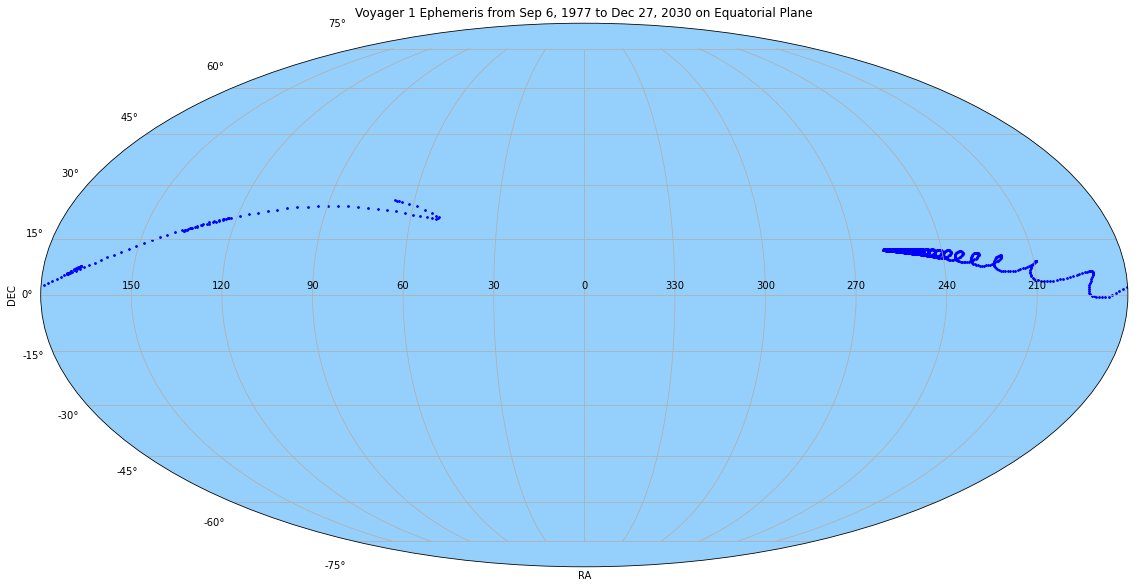

In [12]:
tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection = 'mollweide')
ax.scatter(np.radians(df['ra']), np.radians(df['dec']), c = 'b', s = 3)
ax.set_xticklabels(tick_labels)
ax.set_title("Voyager 1 Ephemeris from Sep 6, 1977 to Dec 27, 2030 on Equatorial Plane")
ax.set_xlabel("RA")
ax.set_ylabel("DEC")
ax.set_facecolor('xkcd:light blue')
ax.grid(True)

plt.savefig('voy1_ephemeris.png')

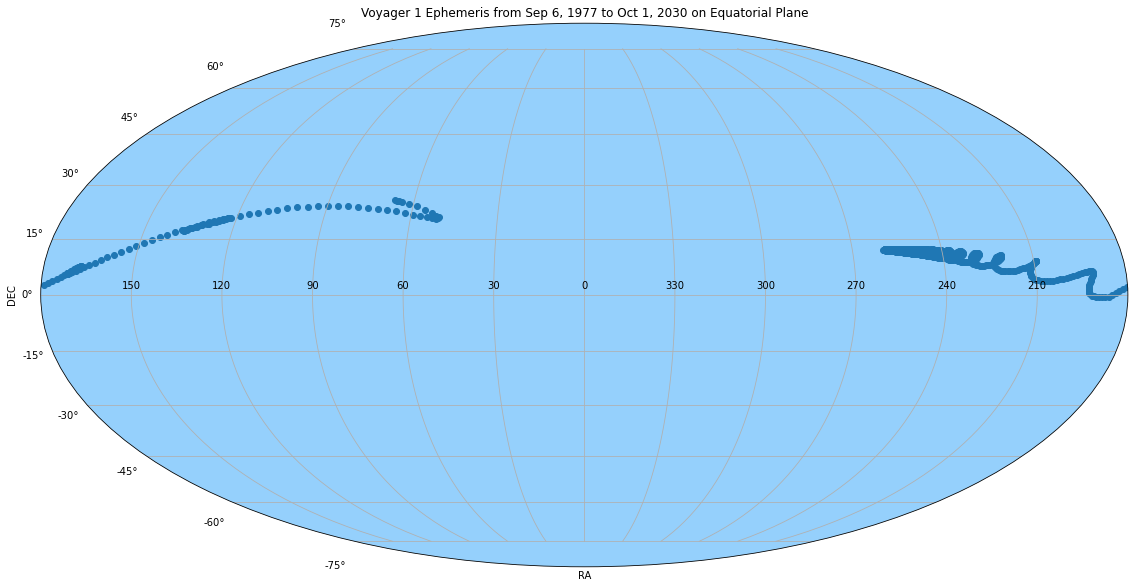

In [16]:
tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection = 'mollweide')
ax.scatter(np.radians(df['ra']), np.radians(df['dec']))
ax.set_xticklabels(tick_labels)
ax.set_title("Voyager 1 Ephemeris from Sep 6, 1977 to Oct 1, 2030 on Equatorial Plane")
ax.set_xlabel("RA")
ax.set_ylabel("DEC")
ax.set_facecolor('xkcd:light blue')
ax.grid(True)

plt.savefig('voy1_ephemeris_v2.png')